<a href="https://colab.research.google.com/github/lauratcc18/IAMINTIC/blob/main/3_Seleccion_para_problema_de_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de Características
## Problema de regresión
En este caso crearemos un dataset numérico tanto en variables de entrada como de salida para modelar un problema de regresión. Para ello usaremos la función make_regression().

En un problema de regresión, se puede caluclar que tan fuerte es la relación entre cada entrada con la salida, midiendo su correlación y comparandola con la de las demás variables

### 1. Crear el dataset
La función make_regression() nos permite adicionalmente definir el número de muestras, cuántas características de entrada y cuántas de ellas son o no relevantes para la salida.

En este caso crearemos un dataset con 1000 muestras y 100 atributos (10 relevantes y 90 irrelevantes) y lo dividiremos en sets de entrenamiento y pruebas para poder ajustar y evaluar el modelo de predicción.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generar el dataset de regresion
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1,
random_state=1)

# Dividirlo en sets de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


<B>Imprima cómo quedaron repartidos los valores entre los datasets (su forma) </B>

<!-- Puede usar el siguiente código:

# Mostrar estatus
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

-->

In [ ]:
# Digite su código aqui


###2. Aplicar el método de selección de características
Para datasets numéricos es común utilizar métodos de correlación estadística para seleccionar las características más relevantes. La correlación mide como dos variables cambian conjuntamente, es decir, que tan fuerte el cambio en una variable afecta a la segunda.

Una de las más usadas en la correlación de Pearson que asume una distribución Gausiana en cada variable y reporta su relación lineal. El valor de correlación varía entre -1 y 1, donde el 0 significa que no hay correlación, el 1 una correlación directa y el -1 una correlación inversa.

Para seleccionar características se manejan valores entre 0 y 1, buscando los que más se aproximen al 1.

<B>Utilizando la función f_regression, aplique el método de selección de características para evaluar todos los atributos, de forma similar a como se realizó con chi2 y con mutual information. </B>

<!-- Puede utilizar el siguiente código:

# Selección de características con correlación estadística
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

-->


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Digite su código aqui:
fs = SelectKBest(score_func=f_regression, k="all")
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)


<B>Imprima los puntajes de cada variable (entre más alto, mejor) y grafíquelos para darse una idea de cuántas características debería seleccionar.</B>

<!-- Puede usar el siguiente código:

# Puntajes de las características
for i in range(len(fs.scores_)):
	print('Atributo %d: %f' % (i, fs.scores_[i]))
# Diagrama de puntajes
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
print()
pyplot.show()

-->

Atributo 0: 0.009419
Atributo 1: 1.018881
Atributo 2: 1.205187
Atributo 3: 0.000138
Atributo 4: 0.167511
Atributo 5: 5.985083
Atributo 6: 0.062405
Atributo 7: 1.455257
Atributo 8: 0.420384
Atributo 9: 101.392225
Atributo 10: 0.387091
Atributo 11: 1.581124
Atributo 12: 3.014463
Atributo 13: 0.232705
Atributo 14: 0.076281
Atributo 15: 4.299652
Atributo 16: 1.497530
Atributo 17: 0.261242
Atributo 18: 5.960005
Atributo 19: 0.523219
Atributo 20: 0.003365
Atributo 21: 0.024178
Atributo 22: 0.220958
Atributo 23: 0.576770
Atributo 24: 0.627198
Atributo 25: 0.350687
Atributo 26: 0.281877
Atributo 27: 0.584210
Atributo 28: 52.196337
Atributo 29: 0.046855
Atributo 30: 0.147323
Atributo 31: 0.368485
Atributo 32: 0.077631
Atributo 33: 0.698140
Atributo 34: 45.744046
Atributo 35: 2.047376
Atributo 36: 0.786270
Atributo 37: 0.996190
Atributo 38: 2.733533
Atributo 39: 63.957656
Atributo 40: 231.885540
Atributo 41: 1.372448
Atributo 42: 0.581860
Atributo 43: 1.072930
Atributo 44: 1.066976
Atributo 45: 

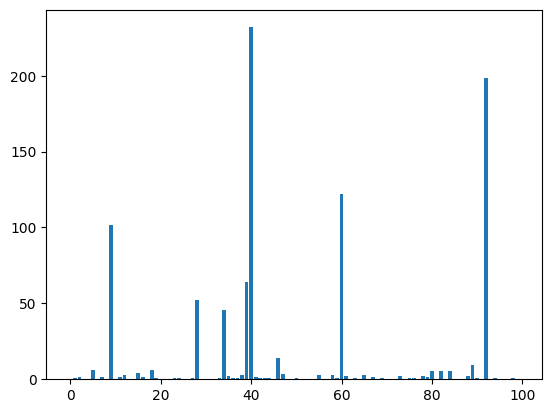

In [ ]:
from matplotlib import pyplot

# Digite su código aqui:
# Puntajes de las características
for i in range(len(fs.scores_)):
	print('Atributo %d: %f' % (i, fs.scores_[i]))
# Diagrama de puntajes
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
print()
pyplot.show()

Los puntajes y la gráfica nos permiten elegir el valor más adecuado para k en SelectKBest.

###3. Modelar
Vamos a comparar los resultados que se obtendrían si se aplica un modelo de Regresión lineal que utilice todas las variables de entrada disponibles, contra el modelo con características seleccionadas por correlación estadística.

####3.1 Modelo usando todas las características
Inicialmente evaluamos el modelo LinearRegression con todas las características, entrenado en el dataset de entrenamiento y evaluado en el de pruebas.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Ajustar el modelo
modeloRL = LinearRegression()
modeloRL.fit(X_train, y_train)
# Evaluar el modelo
ypred = modeloRL.predict(X_test)
# Evaluar la predicción
error = mean_absolute_error(y_test, ypred)
print('Error absoluto medio: %.3f' % error)

Error absoluto medio: 0.086


####3.2 Modelo construido con correlación estadística
Seleccionemos las 10 características más relevantes y generemos el modelo

In [ ]:
# Selección de top-10 caracterítsticas
fs = SelectKBest(score_func=f_regression, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Ajustar el modelo
modeloE = LinearRegression()
modeloE.fit(X_train_fs, y_train)
# Evaluar el modelo
ypredE = modeloE.predict(X_test_fs)
# Evaluar la predicción
ErrorE = mean_absolute_error(y_test, ypredE)
print('Error absoluto: %.3f' % ErrorE)

Error absoluto: 2.740


<B>¿Qué conclusiones puede obtener de los resultados?

¿Cómo varía el resultado con diferentes valores de k?.</B>

###4. Sintonizar el número de características (k)
El objetivo es probar sistemáticamente diferentes valores para k, de forma que se descubra el valor que genera el mejor desempeño del modelo (grilla de búsqueda). Para ello se usa la función RepeatedKFold con 3 repeticiones y 10 grupos y se crea un pipeline que transforme el dataset de entrenamiento con las características seleccionadas y lo aplique a los sets de entrenamiento y prueba en cada validación cruzada.

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline

# Definir el método de evaluación
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Definir pipeline para evaluar
modelo = LinearRegression()
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline(steps=[('sel', fs), ('lr', modelo)])

Posteriormente se define la grilla de búsqueda con valores entre 80 y 100 características (para ello se crea un diccionario donde en el nombre del objeto (sel__k) se cambiará el valor de k por cada valor buscado) y se ejecuta la búsqueda evaluando el modelo con el error absoluto medio negativo.

En este caso se usa el errro absoluto medio negativo porque sklearn requiere que se maximice el puntaje y por ello el error se evalúa con valores entre -infinito y 0 (el mejor).

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir la grilla
grilla = dict()
grilla['sel__k'] = [i for i in range(X.shape[1] - 20, X.shape[1] + 1)]

# Definir la grilla de búsqueda
busqueda = GridSearchCV(pipeline, grilla, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

# Ejecutar la búsqueda
resultados = busqueda.fit(X,y)

Finalmente se procede a mostrar los resultados

In [ ]:
# Resumir los mejores
print('Mejores errores absolutos_ %.3f' % resultados.best_score_)
print('Mejores configuraciones: %s' % resultados.best_params_)

# Resumir todos
medias = resultados.cv_results_['mean_test_score']
parametros = resultados.cv_results_['params']
for media, param in zip(medias, parametros):
  print('Error %.3f con: %r' % (media, param))

Mejores errores absolutos_ -0.083
Mejores configuraciones: {'sel__k': 100}
Error -2.324 con: {'sel__k': 80}
Error -2.137 con: {'sel__k': 81}
Error -1.958 con: {'sel__k': 82}
Error -1.853 con: {'sel__k': 83}
Error -1.756 con: {'sel__k': 84}
Error -1.663 con: {'sel__k': 85}
Error -1.667 con: {'sel__k': 86}
Error -1.389 con: {'sel__k': 87}
Error -1.016 con: {'sel__k': 88}
Error -0.927 con: {'sel__k': 89}
Error -0.928 con: {'sel__k': 90}
Error -0.842 con: {'sel__k': 91}
Error -0.842 con: {'sel__k': 92}
Error -0.742 con: {'sel__k': 93}
Error -0.743 con: {'sel__k': 94}
Error -0.743 con: {'sel__k': 95}
Error -0.650 con: {'sel__k': 96}
Error -0.464 con: {'sel__k': 97}
Error -0.372 con: {'sel__k': 98}
Error -0.183 con: {'sel__k': 99}
Error -0.083 con: {'sel__k': 100}


<B>Repita el procedimiento anterior usando la función estadística mutual information (mutual_info_regression) que puede importar de sklearn.feature_selection, y observe los resultados.</B>